## Support vector machines

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.base import clone
from sklearn import datasets
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,recall_score,confusion_matrix,mean_squared_error,precision_score,recall_score,fbeta_score,f1_score,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier,SGDRegressor,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit,cross_val_predict,GridSearchCV,RandomizedSearchCV,HalvingRandomSearchCV,HalvingGridSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn import preprocessing
import re
import matplotlib as mpl
from pandas_profiling import ProfileReport
pd.set_option("display.precision", 6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification, fetch_openml,make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC,LinearSVC
from mlxtend.plotting import plot_decision_regions

## what are the support vectors?<br>
they are the instances on the decision boundary that is created by svm which is its main goal to make the widest margin between classes, and this is called large margin classification<br>
or on the edge of the soft margin<br>
SVMs are sensitive to feature scale so, you have to make scaling

## Hard margin classifier 
the main issues that it is sensitive to outliers, and works well on classes that are linearly separable.<br>
Doesnt allow misclassification.
we can solve that by using <mark> soft margin classifier</mark>  which allow misclassification to avoid overfitting

## If your SVM model is overfitting, you can try regularizing it by reducing C.

In [2]:
iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica
svm_clf = make_pipeline(StandardScaler(),
LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

<IPython.core.display.Javascript object>

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [3]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)


array([ True, False])

In [4]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

any observation inside soft margin is misclassified 

## all the above can work only with data that can be linearly separable

## the ideas behind the support vector machines are:
<ul>
<li>start with data has low dimensions</li>
<li> moving data to higher dimensions</li>
<li> find support veector classifier that separates higher dimensions of data into 2 groups</li>
</ul>

## If data is not linear then we have 2 ways to deal with this
1- we can use polynomial features to change them from nonlinear to linear ones<br>
2- we can use the polynomial kernel by setting the degree to a number <br>

## 1- Polynomial features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

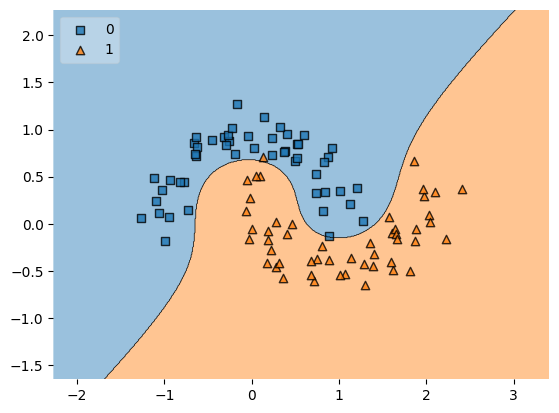

In [5]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3),StandardScaler(),LinearSVC(C=10, max_iter=10_000, random_state=42))
polynomial_svm_clf.fit(X, y)
plot_decision_regions(X, y, clf=polynomial_svm_clf, legend=2)
plt.show()

It can work well but on the huge datasets will be very slow

## 2- Polynomial kernel

<IPython.core.display.Javascript object>

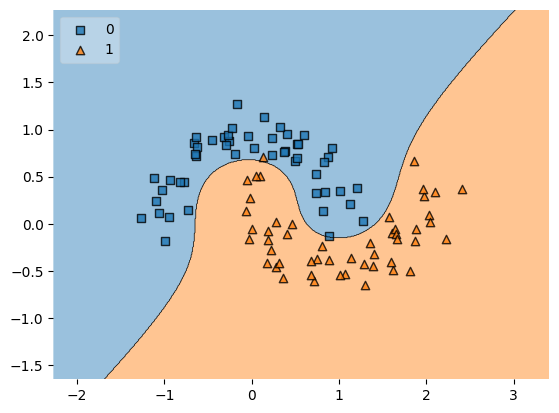

In [6]:
from sklearn.svm import SVC
poly_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)
plot_decision_regions(X, y, clf=polynomial_svm_clf, legend=2)
plt.show()

if your model is overfitting, you might want to reduce the polynomial degree, Conversely, if it is underfitting, you can try increasing it.

## we can overcome the non linear classes by similarity features using Gaussian rbf

we assume the similarity function for example y=0.2(this is a bell shaped varies from 0 to 1), let [x1 = -2 , and x2 = 1] both of them are called landmarks <br>
now we are ready to calculate new features: let [x1 = -1] new instance its new features are exp(-similarity function * distance between(instance and first landmark & second one))<br>
= exp(-0.2 * (1)), and exp(-0.2*(2)) equal to (0.81, 0.67) equivalent to a point, Therefore they are now linearly separable<br>

<IPython.core.display.Javascript object>

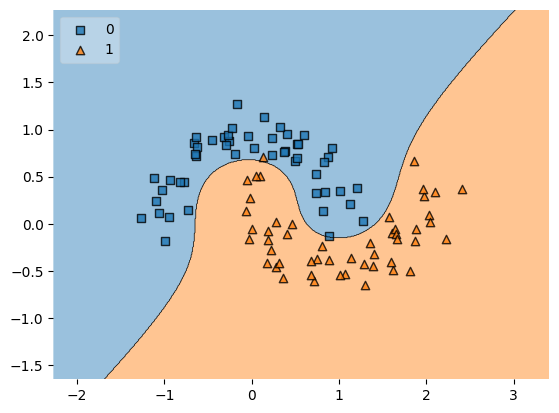

In [7]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)
plot_decision_regions(X, y, clf=polynomial_svm_clf, legend=2)
plt.show()

![Complexity](https://user-images.githubusercontent.com/96451039/214792250-a30e0a8b-7c8d-4153-ae9b-13a77228f7b8.png)


## All the above are classifiers we will know the regressors next

To use SVMs for regression instead of classification, the trick is to tweak the objective:
instead of trying to fit the largest possible street between two classes while limiting margin
violations, SVM regression tries to fit as many instances as possible on the street while
limiting margin violations (i.e., instances off the street). The width of the street is controlled
by a hyperparameter, ϵ. Figure 5-10 shows two linear SVM regression models trained on
some linear data, one with a small margin (ϵ = 0.5) and the other with a larger margin (ϵ =
1.2).